In [26]:
from fastcore.all import *
import time

from fastdownload import download_url
from fastai.vision.all import *

In [40]:
SEED = 69

In [27]:
def search_images(term, max_images=200):
    url = 'https://duckduckgo.com/'
    res = urlread(url, data={'q':term})
    searchObj = re.search(r'vqd=([\d-]+)\&', res)
    requestUrl = url + 'i.js'
    params = dict(l='us-en', o='json', q=term, vqd=searchObj.group(1), f=',,,', p='1', v7exp='a')
    urls, data = set(), {'next':1}
    while len(urls) < max_images and 'next' in data:
        data = urljson(requestUrl, data=params)
        urls.update(L(data['results']).itemgot('image'))
        requestUrl = url + data['next']
        time.sleep(.2)
        return L(urls)[:max_images]

In [28]:

# term = 'evil clown'
# urls = search_images(term, max_images=1)
# dest = 'evil_clown.jpg'
# download_url(urls[0], dest, show_progress=False)

# im = Image.open(dest)
# im.to_thumb(256,256)

In [29]:
# nterm = 'carnival'
# nurls = search_images(term=nterm, max_images=1)
# download_url(nurls[0], nterm + '.jpg', show_progress=False)
# Image.open(nterm + '.jpg').to_thumb(256,256)

In [30]:
searches = ['evil clown', 'carnival']
path = Path(folder_path:=f"./data/{searches[0].replace(' ', '_')}_or_{searches[1].replace(' ', '_')}")
def get_data(searches:list, path):
    for o in searches:
        dest = (path/o)
        dest.mkdir(exist_ok=True, parents=True)
        download_images(dest, urls=search_images(f'{o} photo'))
        resize_images(path/o, max_size=400, dest=path/o)
get_data(searches=searches, path=path)

In [48]:
failed = verify_images(get_image_files(path))
failed.map(Path.unlink)
if len(failed) == 0: print('Hooray! No failures!') 
else: print('Number of failures:', len(failed))

Number of failures: 10


Due to IPython and Windows limitation, python multiprocessing isn't available now.
So `number_workers` is changed to 0 to avoid getting stuck


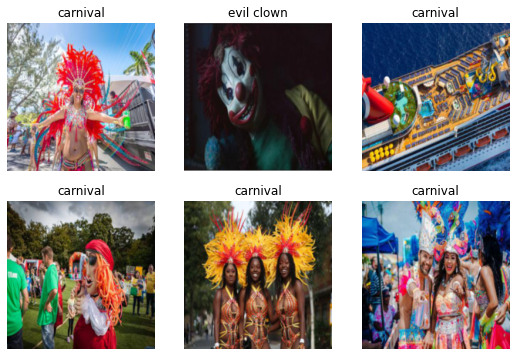

In [49]:
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=.2, seed=SEED),
    get_y=parent_label,
    item_tfms=[Resize(192, method='squish')]
).dataloaders(path)
dls.show_batch(max_n=6)

In [43]:
'butt butt'.replace(' ', '_')

'butt_butt'